# Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score

# Load Data

In [2]:
Data=pd.read_csv('../input/fuelconsumptioncsv/FuelConsumption.csv')

In [3]:
Data.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
print(Data.count())

MODELYEAR                   1067
MAKE                        1067
MODEL                       1067
VEHICLECLASS                1067
ENGINESIZE                  1067
CYLINDERS                   1067
TRANSMISSION                1067
FUELTYPE                    1067
FUELCONSUMPTION_CITY        1067
FUELCONSUMPTION_HWY         1067
FUELCONSUMPTION_COMB        1067
FUELCONSUMPTION_COMB_MPG    1067
CO2EMISSIONS                1067
dtype: int64


# Check 'NaN' in Data

In [5]:
Data.isnull().any()

MODELYEAR                   False
MAKE                        False
MODEL                       False
VEHICLECLASS                False
ENGINESIZE                  False
CYLINDERS                   False
TRANSMISSION                False
FUELTYPE                    False
FUELCONSUMPTION_CITY        False
FUELCONSUMPTION_HWY         False
FUELCONSUMPTION_COMB        False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
dtype: bool


# Check Attribute Correlation

<AxesSubplot:>

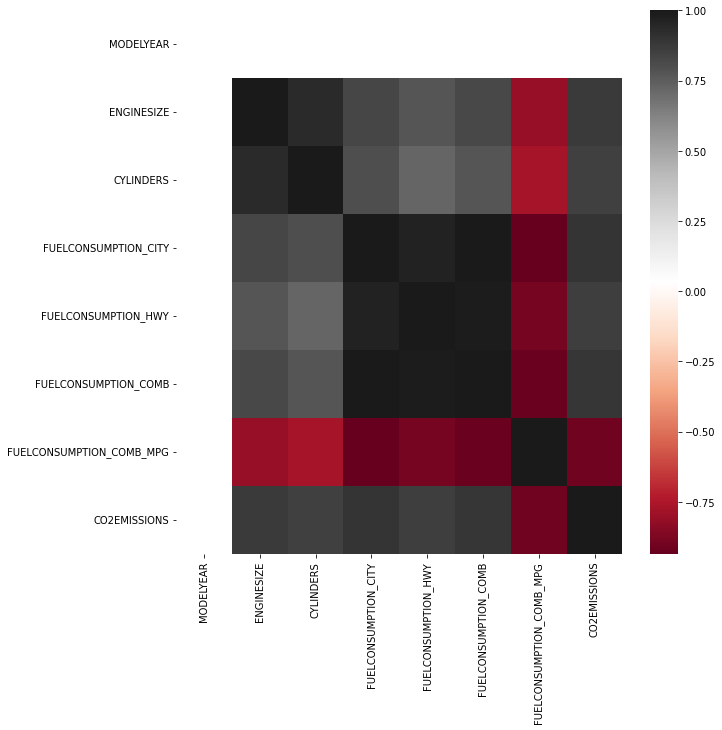

In [6]:
plt.subplots(figsize=(10,10))
sns.heatmap(Data.corr(), cmap = 'RdGy')

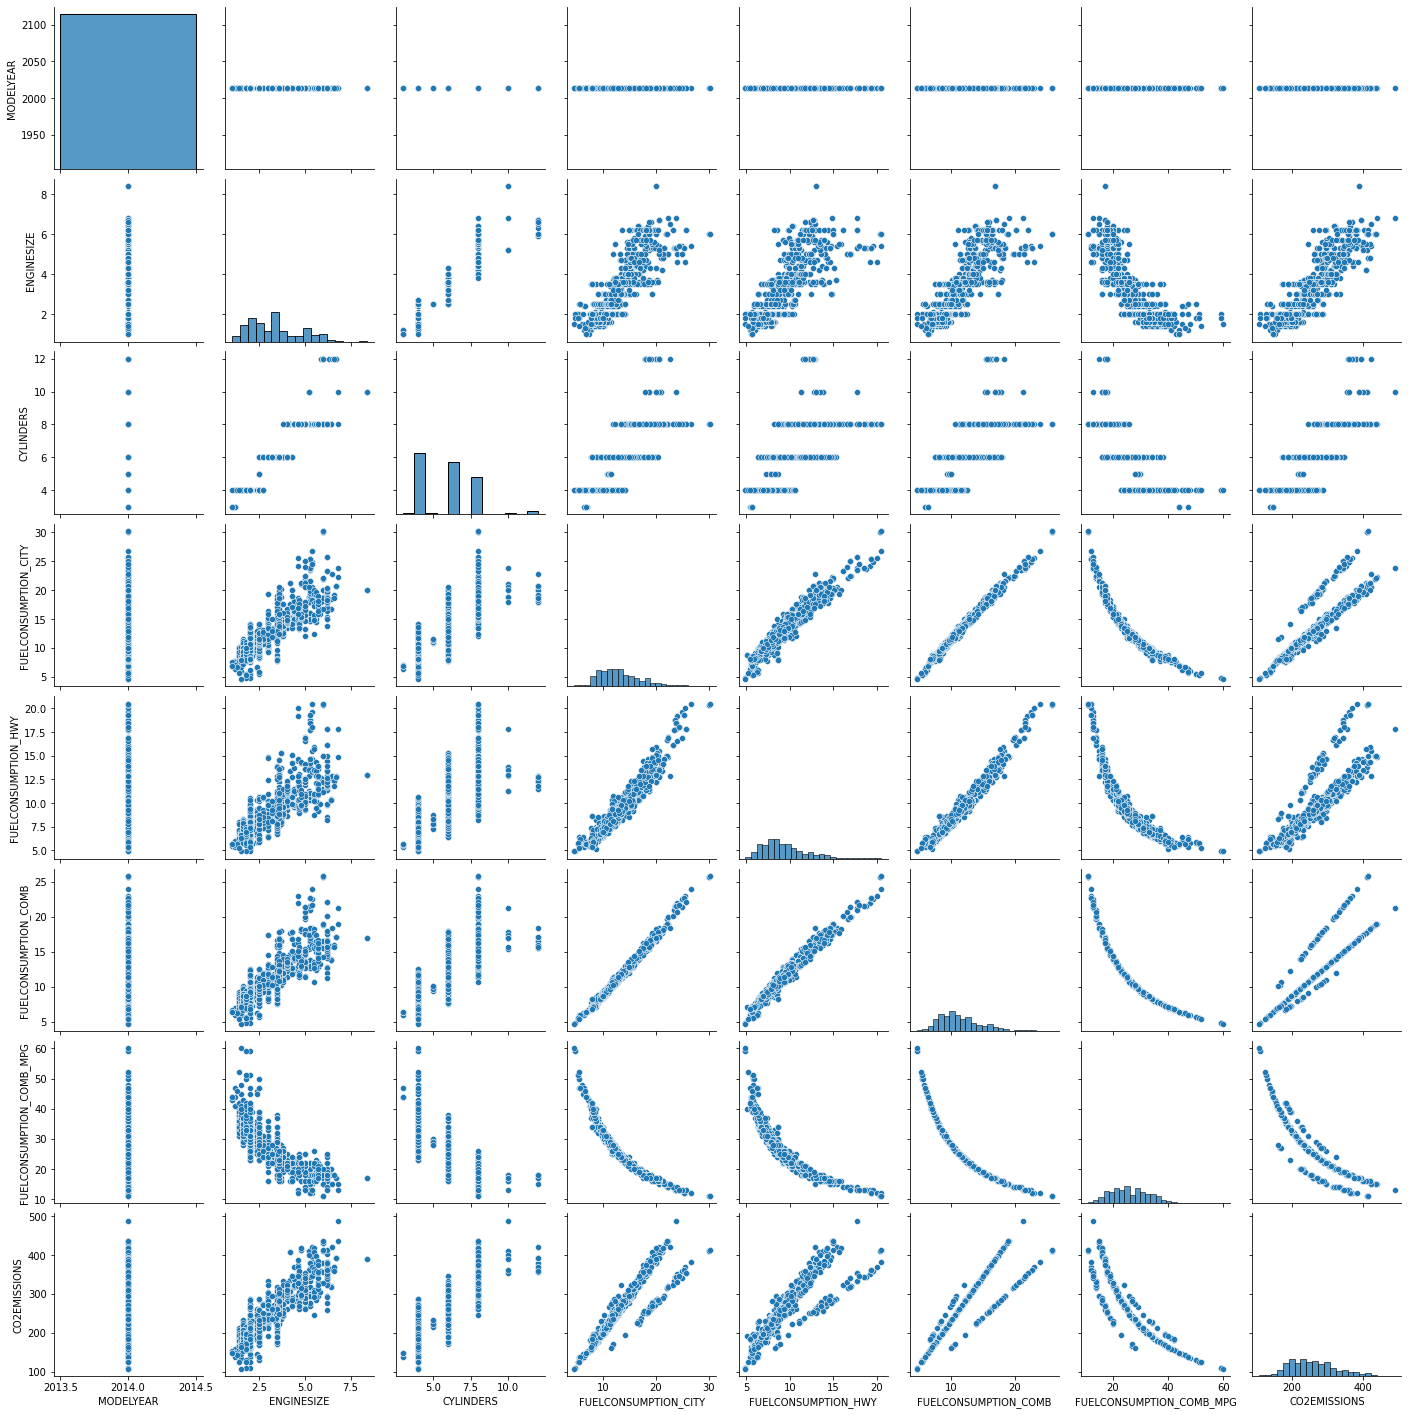

In [7]:
sns.pairplot(Data)

# Plot Data

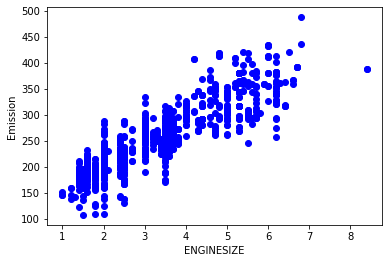

In [8]:
plt.scatter(Data.ENGINESIZE, Data.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

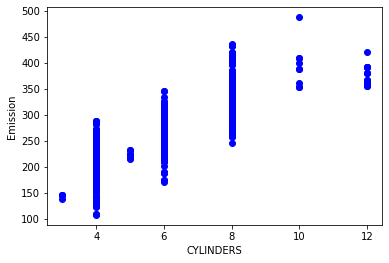

In [9]:
# write your code here
plt.scatter(Data.CYLINDERS, Data.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

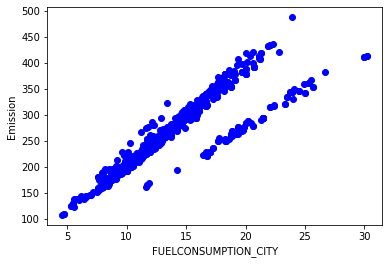

In [10]:
plt.scatter(Data.FUELCONSUMPTION_CITY, Data.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")
plt.show()

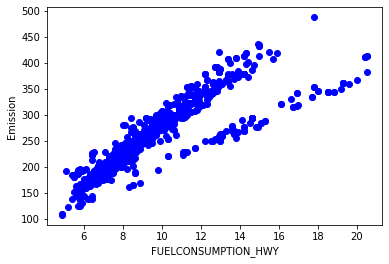

In [11]:
# write your code here
plt.scatter(Data.FUELCONSUMPTION_HWY, Data.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("Emission")
plt.show()

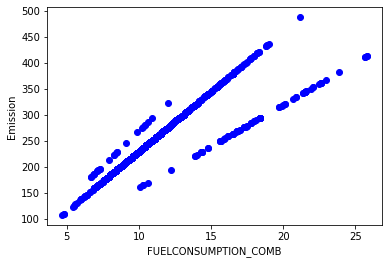

In [12]:
plt.scatter(Data.FUELCONSUMPTION_COMB, Data.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

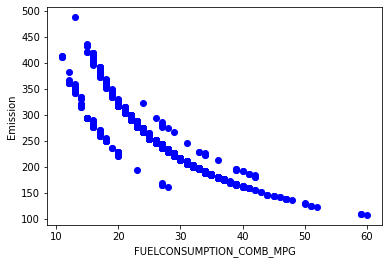

In [13]:
plt.scatter(Data.FUELCONSUMPTION_COMB_MPG, Data.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

# Data Generator

In [14]:
Data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24
1063,3.2,6,13.2,9.5,11.5,25
1064,3.0,6,13.4,9.8,11.8,24
1065,3.2,6,12.9,9.3,11.3,25


In [15]:
x=np.array(Data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]).reshape(-1,6)
y=np.array(Data['CO2EMISSIONS']).reshape(-1,1)

# Train Model

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(x,y,test_size=0.3)

In [17]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit (X_train,y_train)

LinearRegression()

In [18]:
print('Độ dốc:',model.coef_)
print('Hệ Số Chặn:',model.intercept_)

Độ dốc: [[  8.83798447   7.19298249 -17.72892473 -10.85478052  32.44709892
   -3.73415123]]
Hệ Số Chặn: [246.87921916]


# Evaluate model

In [19]:
y_pred=model.predict(X_train)

In [20]:
def Evaluate_model (x,y,model):
    y_pred=model.predict(x)
    print('R2:',r2_score(y,y_pred))
    print('MAE:', metrics.mean_absolute_error(y, y_pred))
    print('MSE:', metrics.mean_squared_error(y, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

In [21]:
print('Data Train')
Evaluate_model (X_train,y_train,model)
print('_____________________________')
print('Data Test')
Evaluate_model (X_test,y_test,model)

Data Train
R2: 0.8909981356721887
MAE: 13.841071614225115
MSE: 442.70500760317674
RMSE: 21.040556256980867
_____________________________
Data Test
R2: 0.8842758765544654
MAE: 13.915601348638315
MSE: 450.9186533631381
RMSE: 21.234845263461143


# Training with Cross validation

In [22]:
from sklearn.model_selection import KFold
kf5 = KFold(n_splits=5, shuffle=False)
LR = linear_model.LinearRegression()
i = 1
for train_index, test_index in kf5.split(x):
    X_train =x[train_index]
    X_test = x[test_index]
    y_train =y[train_index]
    y_test = y[test_index]
    LR.fit(X_train, y_train)
    print(f"Accuracy for the fold no. {i} on the test set: {r2_score(y_test, LR.predict(X_test))}")
    i += 1

Accuracy for the fold no. 1 on the test set: 0.8896531424534617
Accuracy for the fold no. 2 on the test set: 0.8030952625856516
Accuracy for the fold no. 3 on the test set: 0.8666155730694184
Accuracy for the fold no. 4 on the test set: 0.9136450748041182
Accuracy for the fold no. 5 on the test set: 0.9362538451317358


In [23]:
print('Data Train')
Evaluate_model (X_train,y_train,LR)
print('_____________________________')
print('Data Test')
Evaluate_model (X_test,y_test,LR)

Data Train
R2: 0.8777428414122396
MAE: 14.75369361226782
MSE: 500.73874509843534
RMSE: 22.377192520475738
_____________________________
Data Test
R2: 0.9362538451317358
MAE: 10.77110704123065
MSE: 223.00569045914204
RMSE: 14.933375052517166
